## Introduction to ReCell: Your Smartphone at Your Price

A new International Data Corporation forecast predicts that the used phone market would be worth $52.7b by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.
 
ReCell uses machine learning for smartphone sales.

Task: develop a dynamic pricing strategy for used and refurbished smartphones; analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

Task 2: Answer seven business intelligence questions about the data. 

In [1]:
# Analysis of fields
# brand_name: Name of manufacturing brand
# os: OS on which the phone runs
# screen_size: Size of the screen in cm
# 4g: Whether 4G is available or not
# 5g: Whether 5G is available or not
# main_camera_mp: Resolution of the rear camera in megapixels
# selfie_camera_mp: Resolution of the front camera in megapixels
# int_memory: Amount of internal memory (ROM) in GB
# ram: Amount of RAM in GB
# battery: Energy capacity of the phone battery in mAh
# weight: Weight of the phone in grams
# release_year: Year when the phone model was released
# days_used: Number of days the used/refurbished phone has been used
# new_price: Price of a new phone of the same model in euros
# used_price: Price of the used/refurbished phone in euros

## Importing necessary libraries and data

In [2]:
## Are proper packages imported?

import numpy as np # used to work with arrays
import pandas as pd # used for data manipulation 
import seaborn as sns # used for visualization
import matplotlib.pyplot as plt # used for visualization
%matplotlib inline 
# shows plt functions on screen in notebook
import statistics as st
import scipy.stats as stats # a statistical library
from scipy.stats import norm
import csv as csv
import statsmodels as sm
import sklearn as skl
!pip install nb-black
import warnings 
warnings.filterwarnings ('ignore')
# Admin verification: install the scipy version 1.6.1. or newer and restart the kernel after the successful installation
f'Note: instructions to use scipy 1.6.1 preceded by 1.6.2.'
pd.set_option('display.max_columns', None)
pd.set_option ('display.max_rows', 100)
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
reg = linear_model.LinearRegression()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.api as sm
!pip install -U scikit-learn --user

## Load and explore the data

- Load the data set
- Check it's basic properties

In [3]:
df= pd.read_csv(('upd.csv')) # loads the data from the CSV
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.') # f-string to use new Python features
np.random.seed (1)
df.sample (10) # displays rows throughout the entire data set to give broad perspective of the data 
df.head()

There are 3571 rows and 15 columns.


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [4]:
# make a copy of the data prior to changes.
# let's create a copy of the data to avoid any changes to original data
df1 = df.copy()
df1

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.6200,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.3900,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.4700,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

## Data Overview

- There are 3571 rows of data
- There are missing values and non-null values
- I will drop unnecessary rows (df.drop(['xxxx', 'etc'], axis=1, inplace=True)
- One_hot encoding is needed on brand_name, os, 4g, and 5g
- Dependant variable is used_price

In [5]:
df.shape
df.info
df.describe ()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


In [6]:
df.head ()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [7]:
df.isnull().sum().sort_values(ascending=False) # sorts each column by greatest number of missing values. 

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

## Univariate Data Analysis

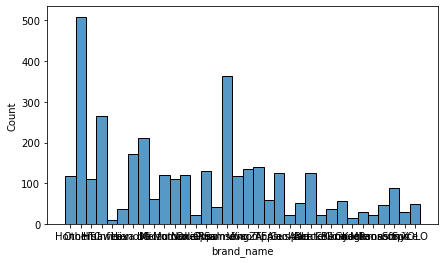

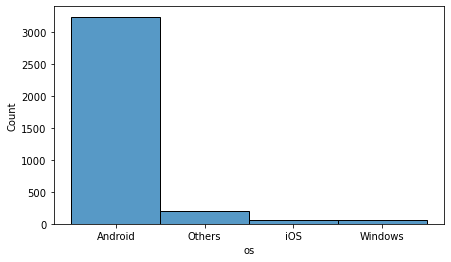

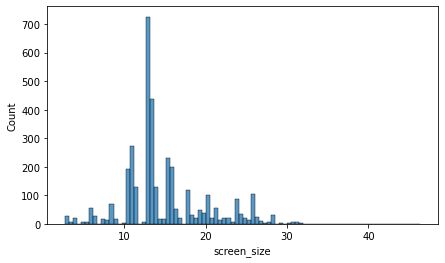

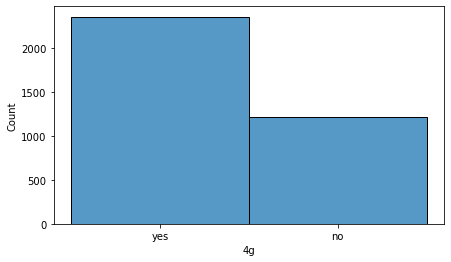

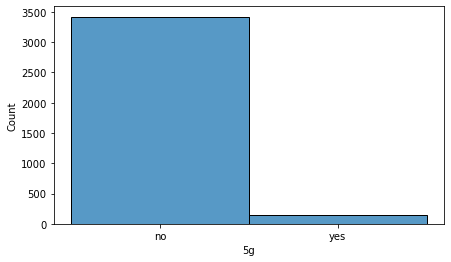

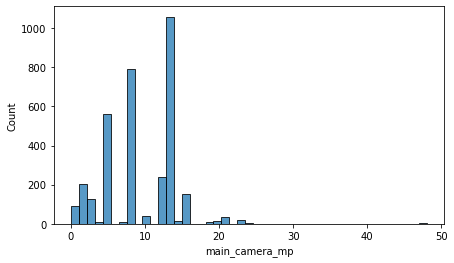

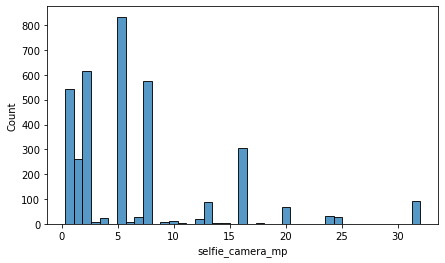

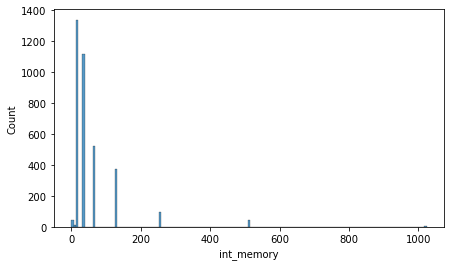

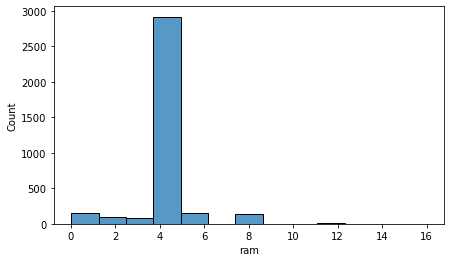

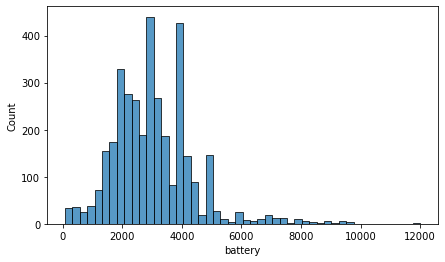

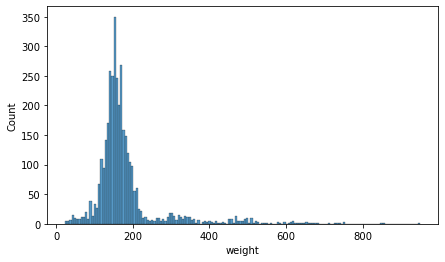

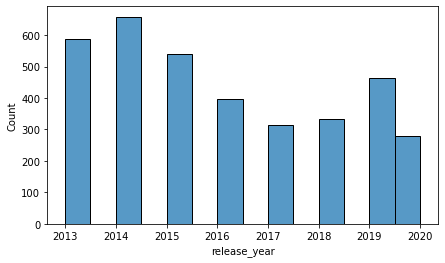

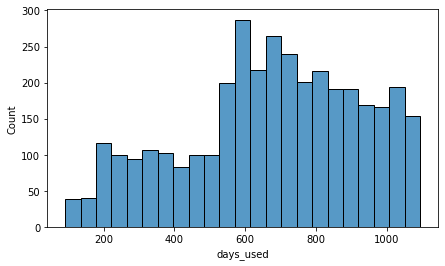

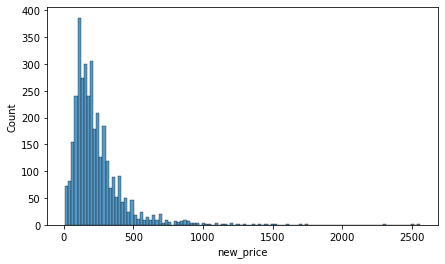

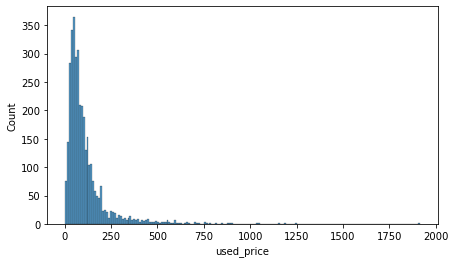

In [8]:
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

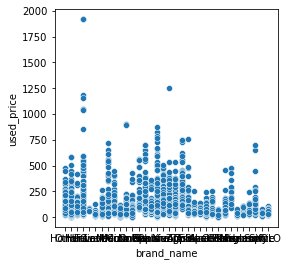

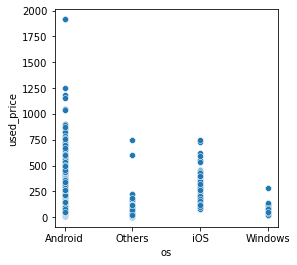

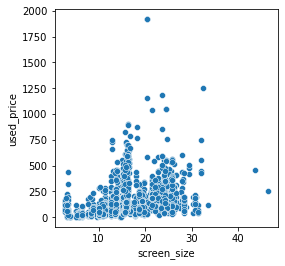

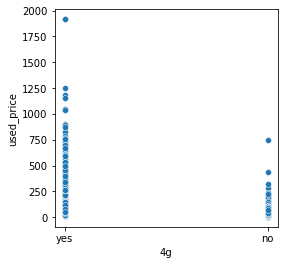

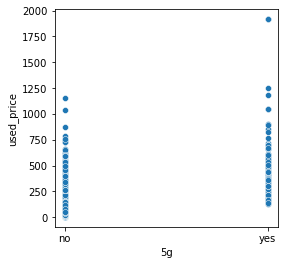

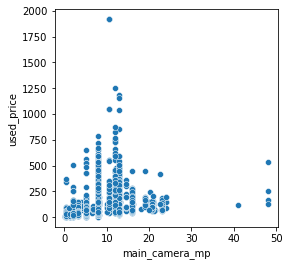

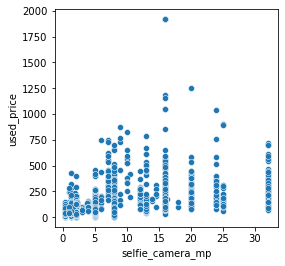

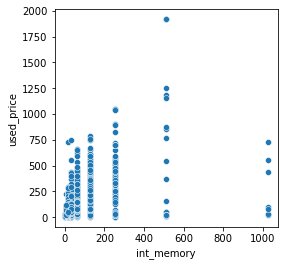

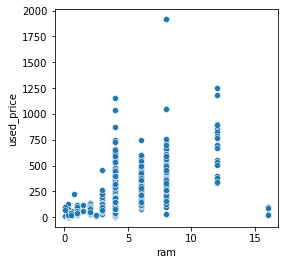

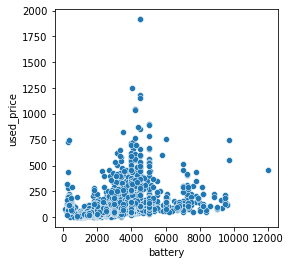

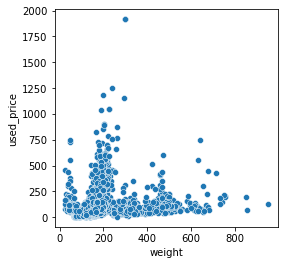

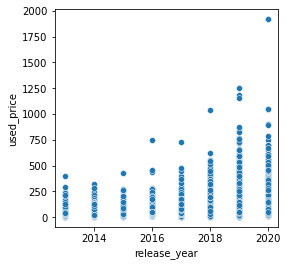

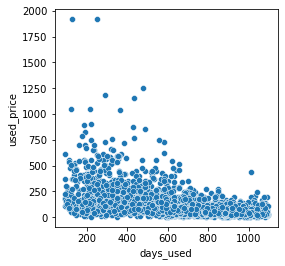

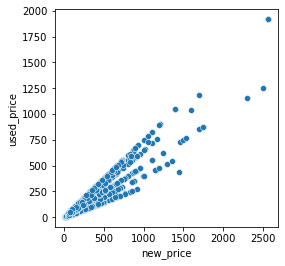

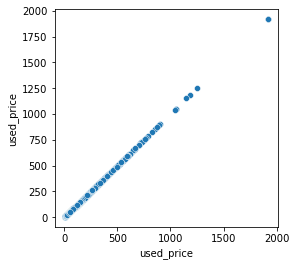

In [9]:
# let's plot the scatterplots of used price with all the features

for i in df.columns:
    plt.figure(figsize=(4, 4))
    sns.scatterplot(data=df, x=i, y="used_price")
    plt.show()

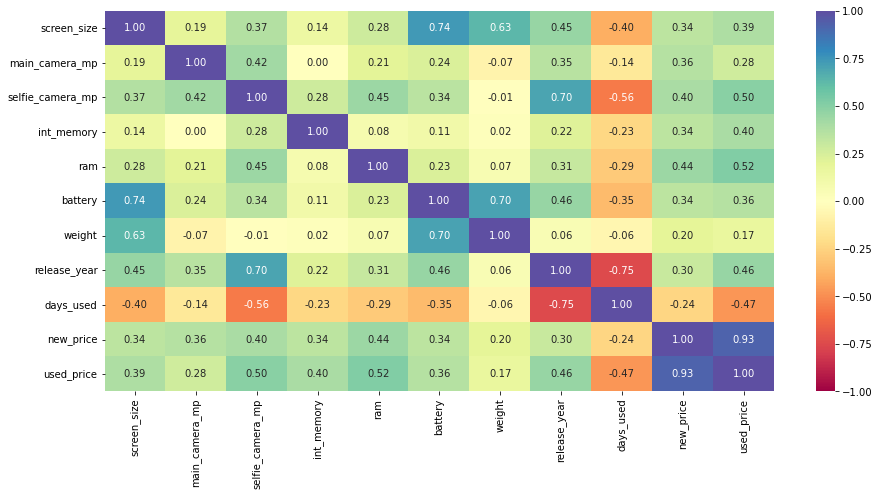

In [10]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Observations
- release year and days used are very negatively correlated. This is naturally occuring due to the nature of time. - I may drop release year as days used better reflects wear on the device. 
    -A deice could sit unused in its wrapper, and still be released on a certain year. 
- New price is highly correlated to the dependant variable (used_price).
- Screen size, battery size and weight are all highly correlated positively.

In [11]:
df.drop(['release_year'], axis=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,111.6200,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,249.3900,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,359.4700,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,149,101.9150,76.07


## Bivariate Data Analysis

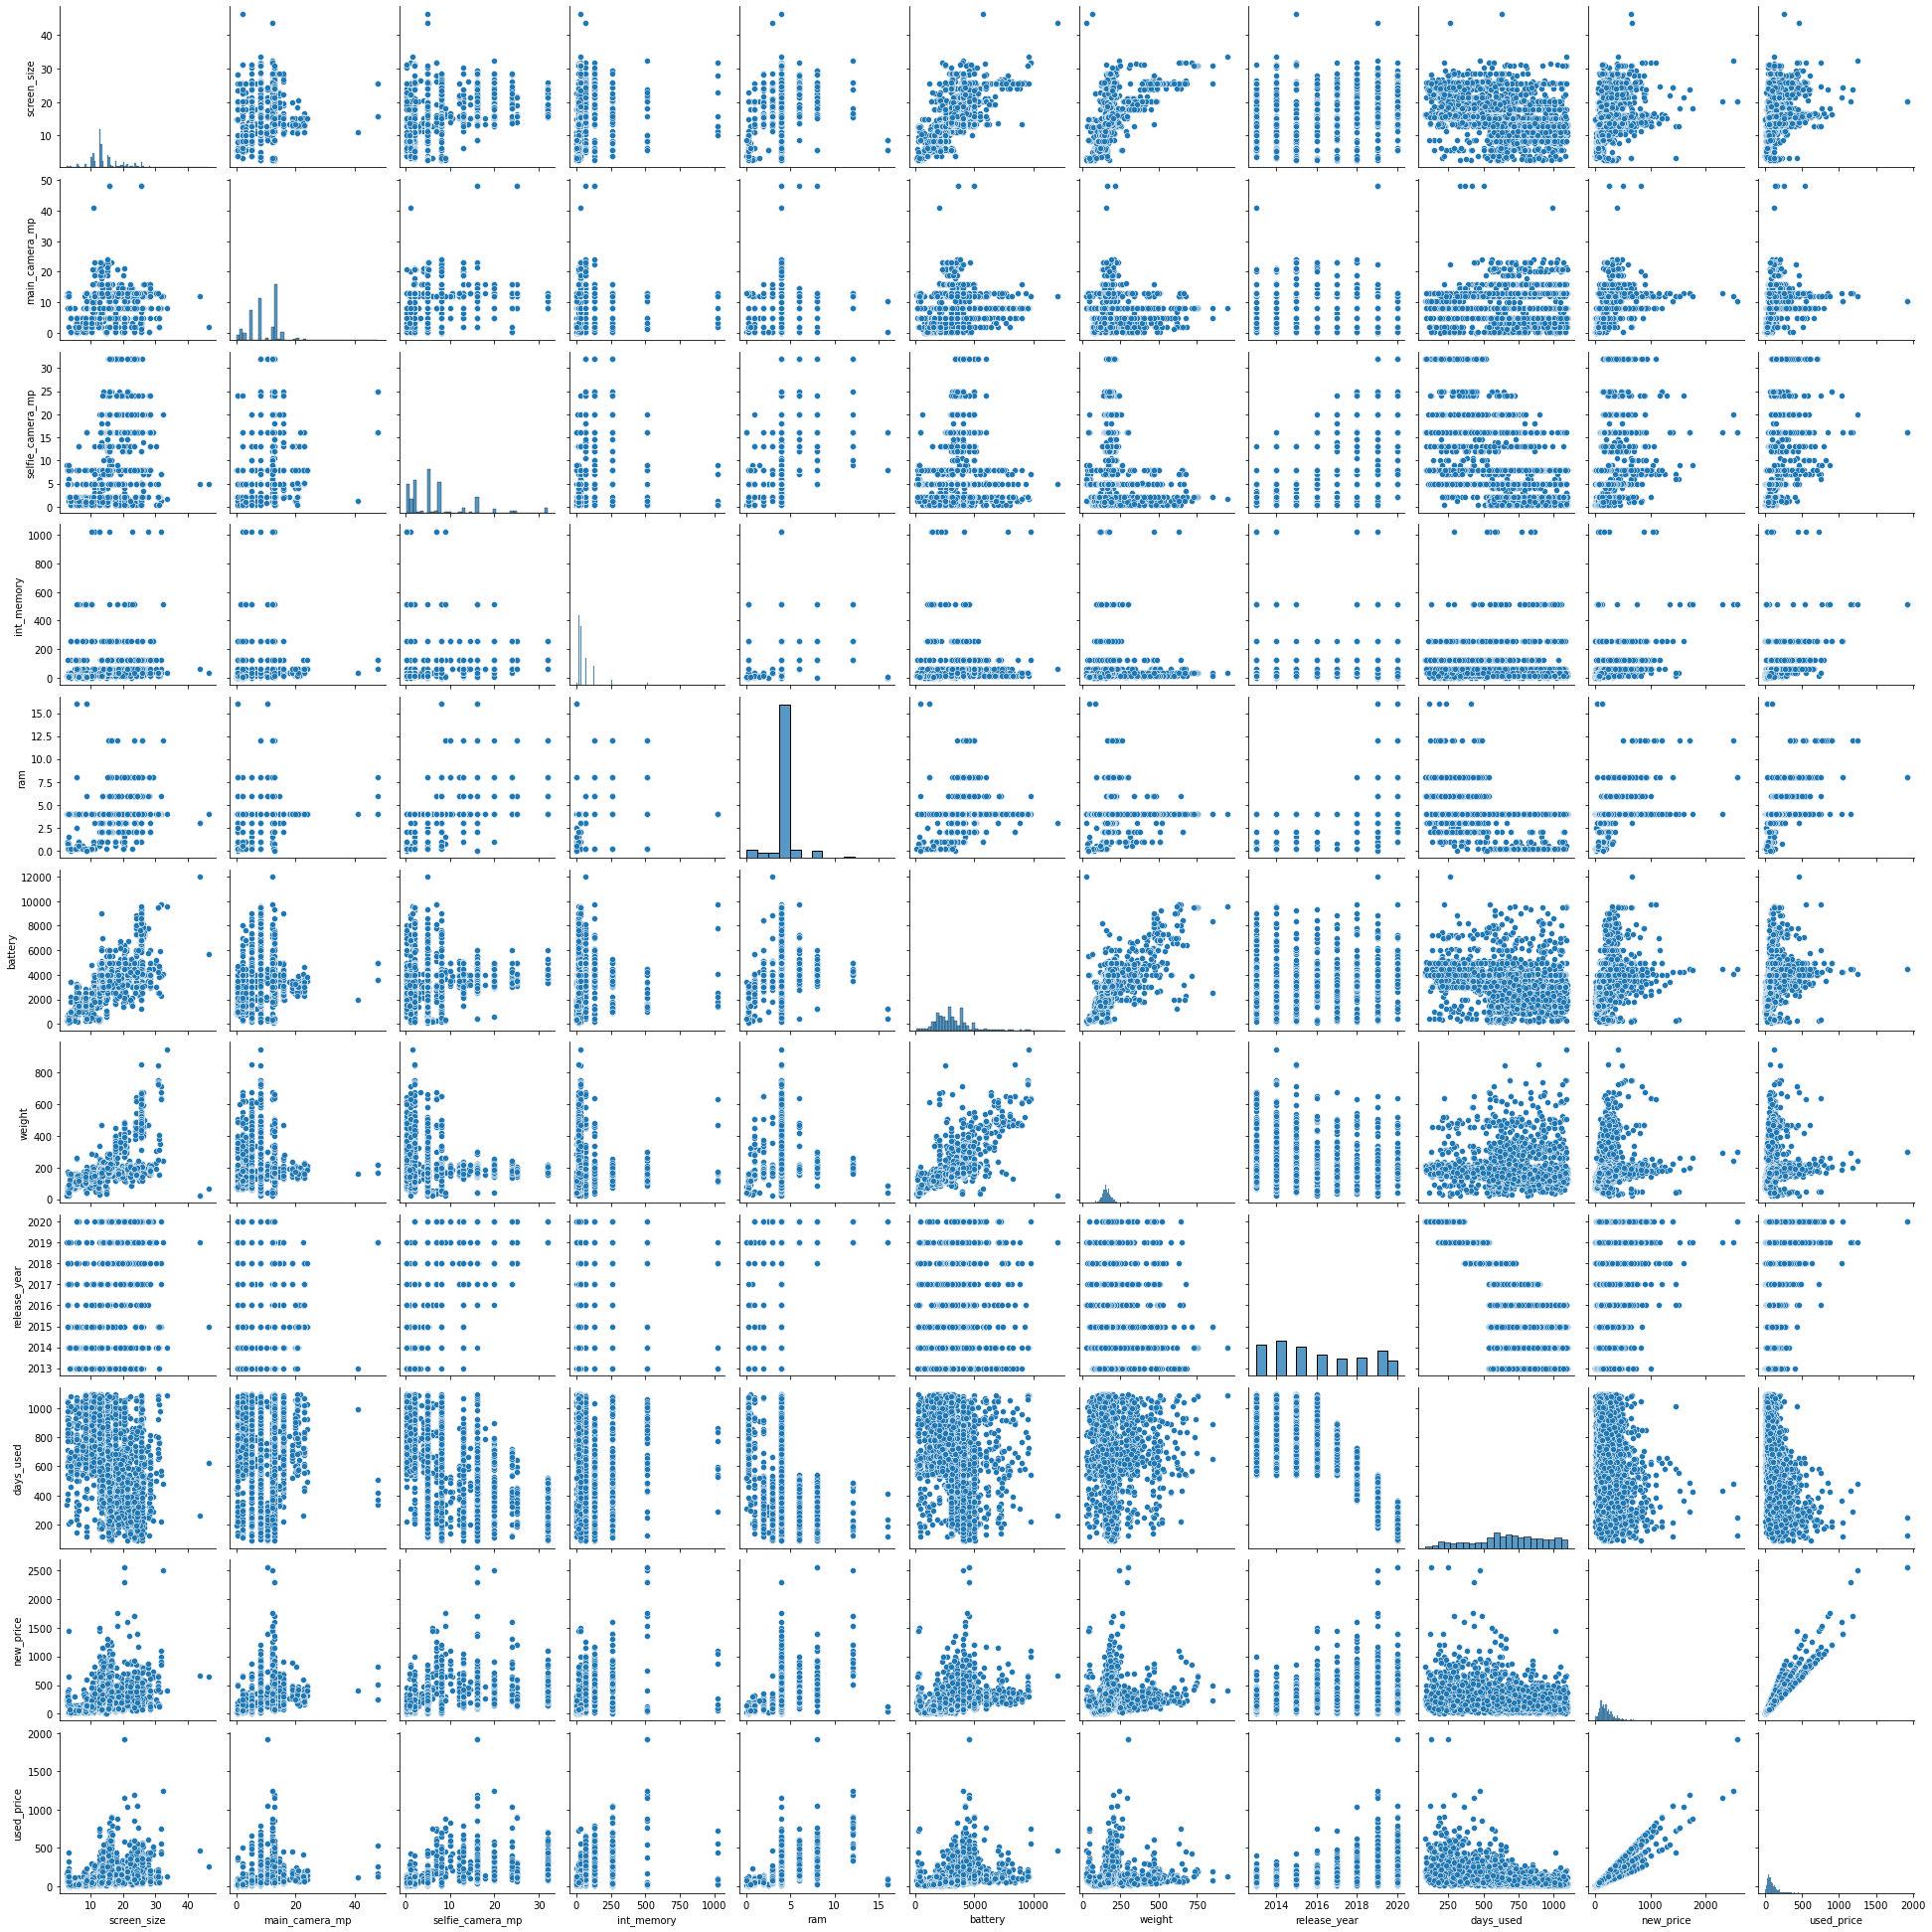

In [12]:
sns.pairplot(data=df)

New price and used price show strong correlation.
Battery and weight show strong positive relationship.
Screen size has strong positive relationship to both battery size and weight. 

## Insights based on EDA

In [13]:
df["4g"].value_counts (dropna=False)

yes    2359
no     1212
Name: 4g, dtype: int64

In [14]:
df["5g"].value_counts (dropna=False)

no     3419
yes     152
Name: 5g, dtype: int64

In [15]:
# df["os"].value_counts (dropna=False) # won't work because of 'get_dummies'

## Data Preprocessing

In [16]:
df.isna().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [17]:
# Missing value treatment: 6 colums have missing values.
# main_camera_mp      180
# int_memory           10
# ram                  10
# weight                7
# battery               6
# selfie_camera_mp      2

In [18]:
# For target drop missing values- Completed
# for Predictor variables, choose appropriate data to fill 
df.dropna (subset=["used_price"], inplace=True) #target 
df.count() # WHY DIDN'T THIS WORK? because none were missing?

brand_name          3571
os                  3571
screen_size         3571
4g                  3571
5g                  3571
main_camera_mp      3391
selfie_camera_mp    3569
int_memory          3561
ram                 3561
battery             3565
weight              3564
release_year        3571
days_used           3571
new_price           3571
used_price          3571
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 446.4+ KB


In [20]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [21]:
# for predictor variables
# use lambda functions such as medianFiller
#see SLF_MLS2_LifeExpectancy_demo for example of filling missing values
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)
df.count()

brand_name          3571
os                  3571
screen_size         3571
4g                  3571
5g                  3571
main_camera_mp      3571
selfie_camera_mp    3571
int_memory          3571
ram                 3571
battery             3571
weight              3571
release_year        3571
days_used           3571
new_price           3571
used_price          3571
dtype: int64

All data fields have same number of entries.

In [22]:
#update df1 (backup)
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3571 non-null   float64
 6   selfie_camera_mp  3571 non-null   float64
 7   int_memory        3571 non-null   float64
 8   ram               3571 non-null   float64
 9   battery           3571 non-null   float64
 10  weight            3571 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 446.4+ KB


In [23]:
#Trying a statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x)  
# Should round floats to 2 decimal places
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.00,NaN,NaN,NaN,14.80,5.15,2.70,12.70,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.00,NaN,NaN,NaN,9.33,4.71,0.08,5.00,8.00,13.00,48.00
selfie_camera_mp,3571.00,NaN,NaN,NaN,6.55,6.88,0.30,2.00,5.00,8.00,32.00
int_memory,3571.00,NaN,NaN,NaN,54.47,84.59,0.01,16.00,32.00,64.00,1024.00
ram,3571.00,NaN,NaN,NaN,4.06,1.39,0.03,4.00,4.00,4.00,16.00
battery,3571.00,NaN,NaN,NaN,3067.11,1363.06,80.00,2100.00,3000.00,4000.00,12000.00


    # Observations after eliminating missing values
the column brand_name has 34 unique values, and 4g and 5g each have two values. 
The mean of os is not a whole number (2.8), so it does not tell us the mean of os. In this case the median is better. 3 is Android os. Brand_name median is also erronious, so median shoud be applied.   

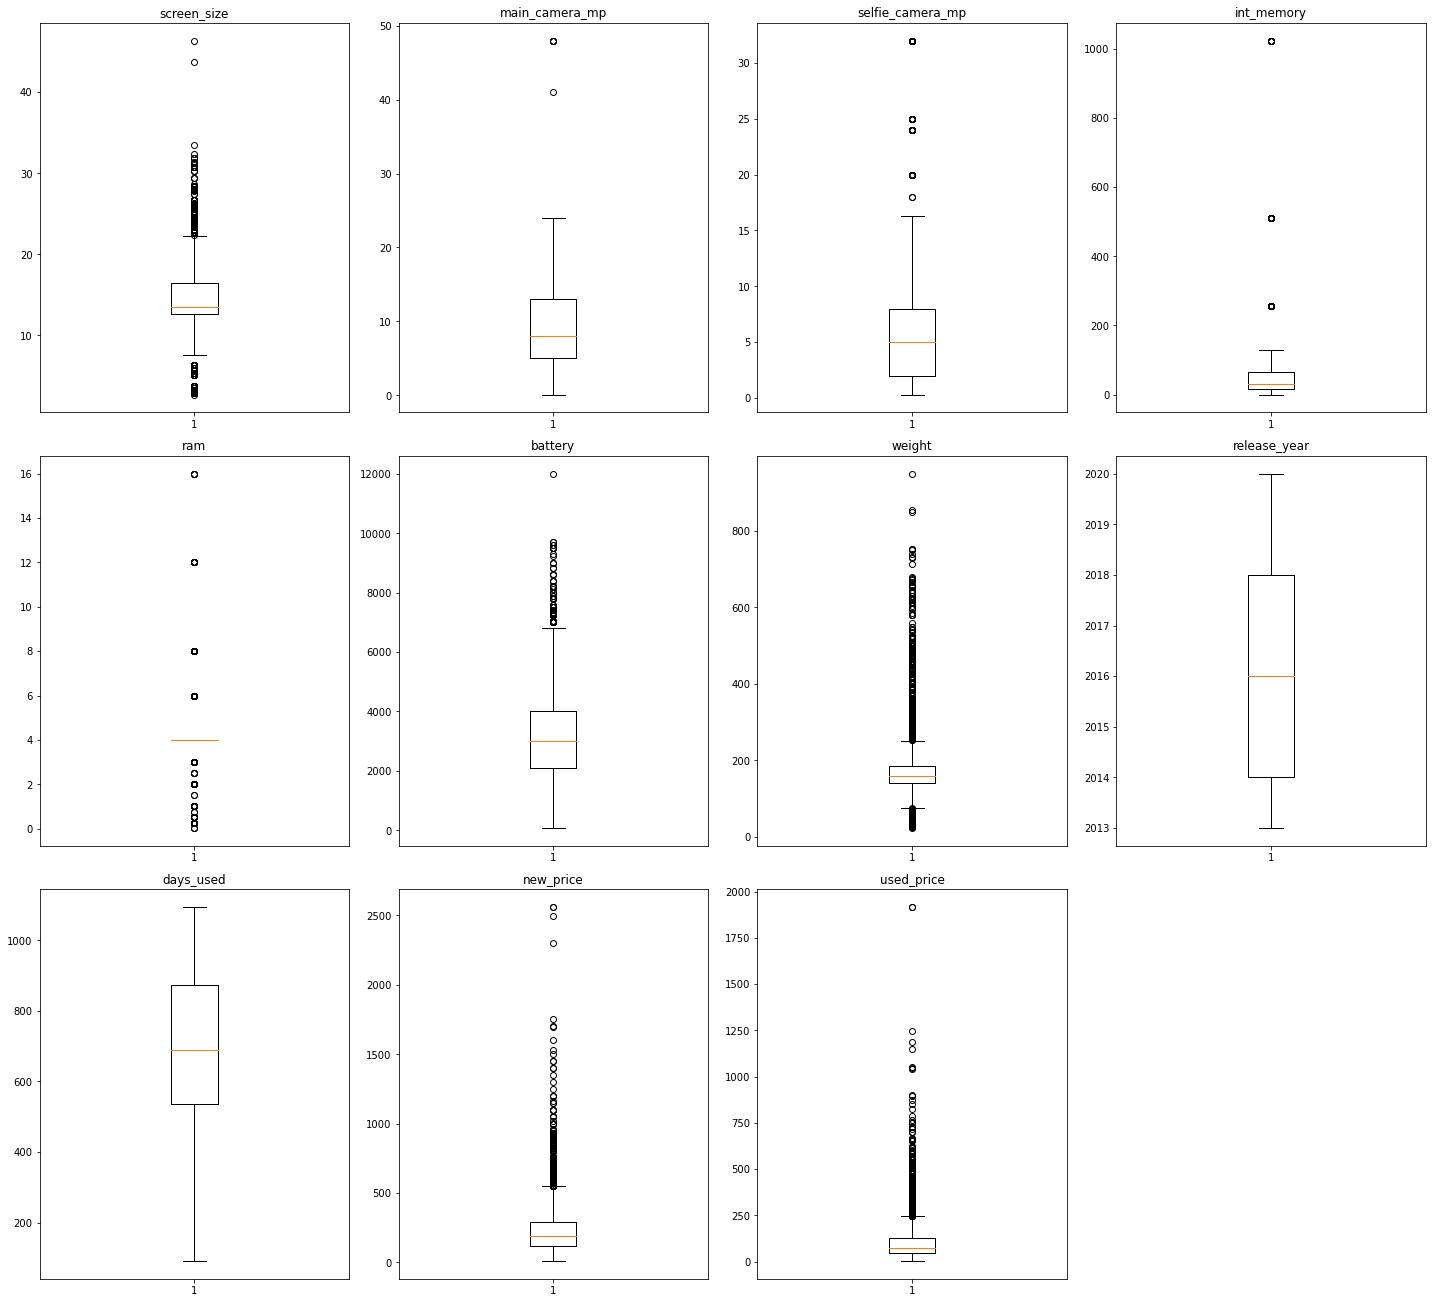

In [24]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Observations
- There are outliers in used_price, ram, battery, main_camera, seifie_camera_mp, and int_memory. 
- These will need treatment; however they also may ipart knowledge or indicate errors in our database. 


In [25]:
def treat_outliers(df, col):
    """
   This will assign values to groups of outliers. 
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
   This treats outliers in columns. 
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [26]:
# Now apply the treatment.
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

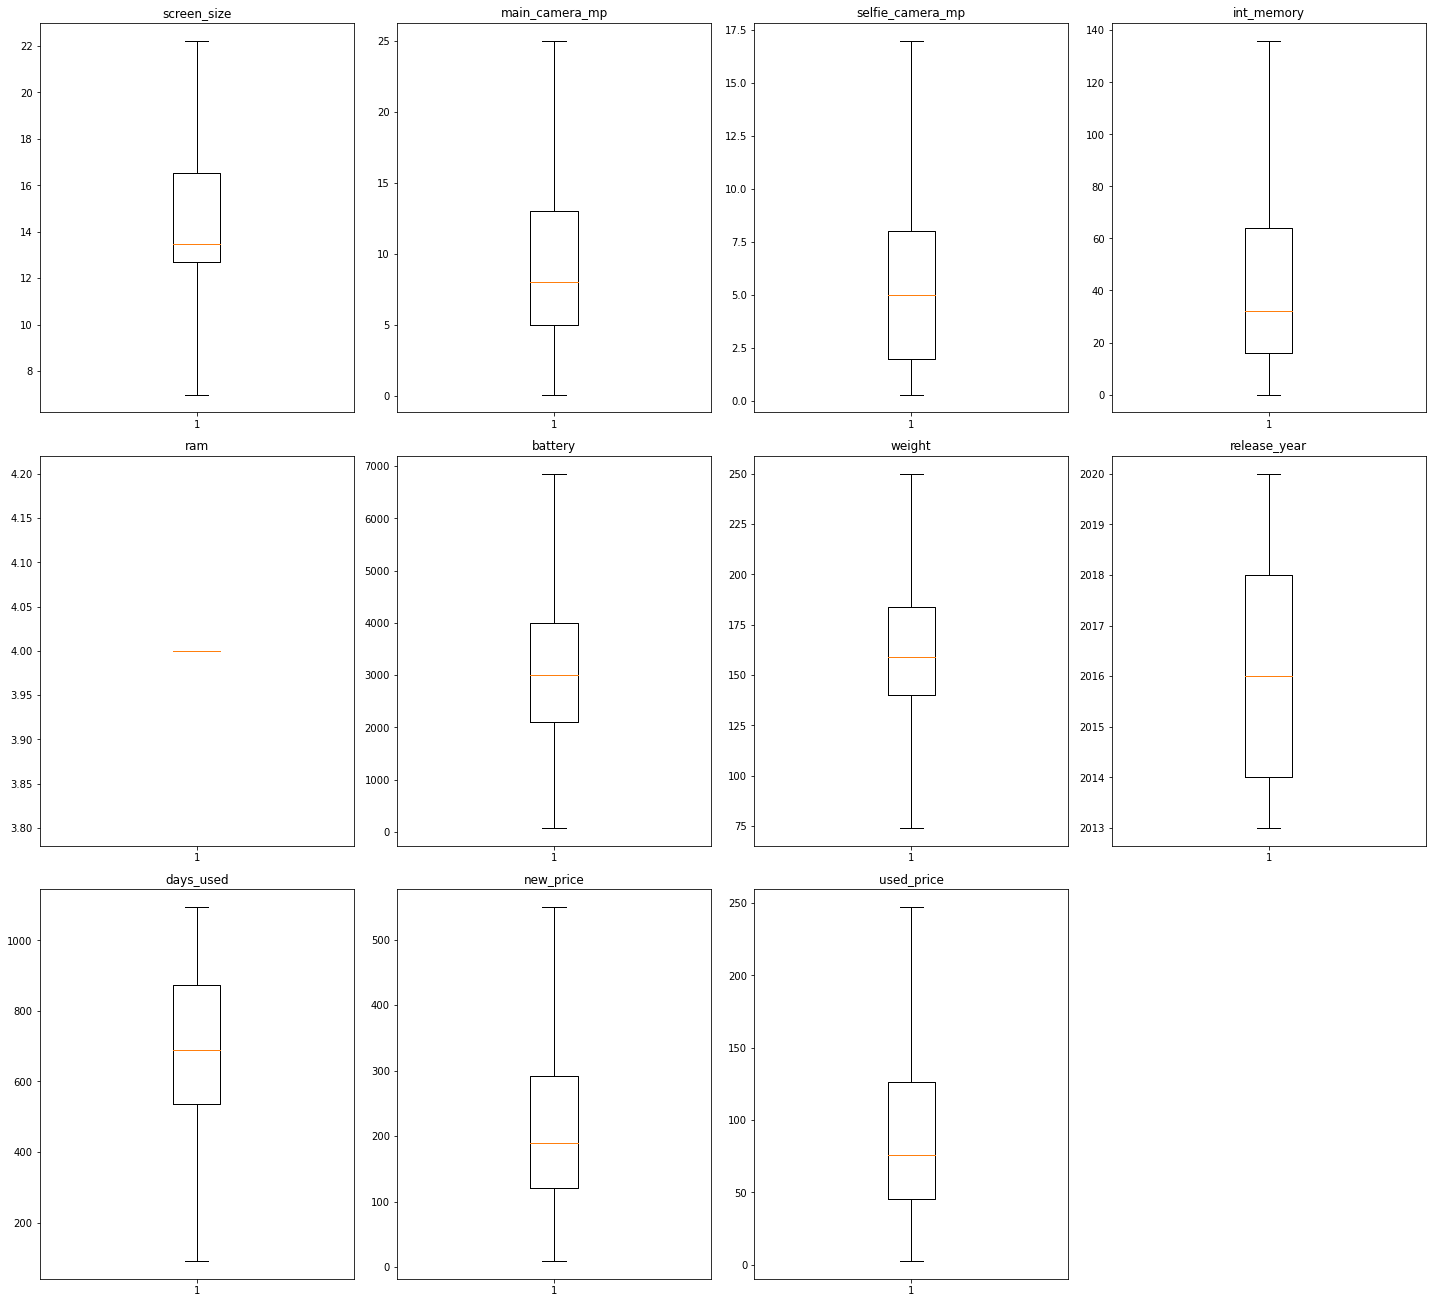

In [27]:
# Redo boxplots to verify
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Observations
-Ram was one of my predicted important variables for customer satisfaction because of Moore's law of processing power. However, the spread of the outliers in the ram data-field was such that outlier treatment renders this field unnecessary. It may be valuable to readdress the utility of measuring ram as an indicator for cell phone longevity. However, cell phone longevity may not be a desired trait in ReCell customers.

# Goals
# os to numeric; One hot encoding
# brand_name is converted using replace() one variable at a time One hit encoding?
# Binary nominal variables (4g, 5g: yes, no) are converted using replace() one variable at a time
# other multiclass nominal variables are converted using get_dummies() at the end


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3571 non-null   float64
 6   selfie_camera_mp  3571 non-null   float64
 7   int_memory        3571 non-null   float64
 8   ram               3571 non-null   float64
 9   battery           3571 non-null   float64
 10  weight            3571 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 446.4+ KB


In [29]:
# hashing out for now; may bring back if can't one hot encode
df['os'].replace({'Android':3, 'Others':2, 'iOS':1, 'Windows':0}, inplace=True)
# Using Get Dummies; Couldn't get one hot encoder to work
df = pd.get_dummies(df, columns=['os'], dtype=float) # this worked
df.head()

,brand_name,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_0,os_1,os_2,os_3
0,Honor,22.23,yes,no,13.00,5.00,64.00,4.00,3020.00,146.00,2020,127,111.62,86.96,0.00,0.00,0.00,1.00
1,Honor,22.23,yes,yes,13.00,16.00,128.00,4.00,4300.00,213.00,2020,325,249.39,161.49,0.00,0.00,0.00,1.00
2,Honor,22.23,yes,yes,13.00,8.00,128.00,4.00,4200.00,213.00,2020,162,359.47,247.19,0.00,0.00,0.00,1.00
3,Honor,22.23,yes,yes,13.00,8.00,64.00,4.00,6850.00,250.00,2020,345,278.93,180.23,0.00,0.00,0.00,1.00
4,Honor,15.72,yes,no,13.00,8.00,64.00,4.00,5000.00,185.00,2020,293,140.87,103.80,0.00,0.00,0.00,1.00


# df['brand_name_written'] = df['brand_name']# got to keep brand name somewhere for answering question #4. it is in df1.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   screen_size       3571 non-null   float64
 2   4g                3571 non-null   object 
 3   5g                3571 non-null   object 
 4   main_camera_mp    3571 non-null   float64
 5   selfie_camera_mp  3571 non-null   float64
 6   int_memory        3571 non-null   float64
 7   ram               3571 non-null   float64
 8   battery           3571 non-null   float64
 9   weight            3571 non-null   float64
 10  release_year      3571 non-null   int64  
 11  days_used         3571 non-null   int64  
 12  new_price         3571 non-null   float64
 13  used_price        3571 non-null   float64
 14  os_0              3571 non-null   float64
 15  os_1              3571 non-null   float64
 16  os_2              3571 non-null   float64


## Data pre-processing of brand_name is causing me trouble
- I'm unsure if I must replace the names with numbers in order to run one_hot_encoder
- later, I'm unsure if the result of One_hot_encoder was successful- it is tied to the error in my linear regression

In [31]:
# need to encode brand name to numeric
# b_n = np.array(df['brand_name'])
# np.unique(df['brand_name'])
# Using Get Dummies; Couldn't get one hot encoder to work
# df = pd.get_dummies(df, columns=['brand_name'], dtype=float) # this worked
# df.head()
df.drop(['brand_name'], axis=1)

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_0,os_1,os_2,os_3
0,22.23,yes,no,13.00,5.00,64.00,4.00,3020.00,146.00,2020,127,111.62,86.96,0.00,0.00,0.00,1.00
1,22.23,yes,yes,13.00,16.00,128.00,4.00,4300.00,213.00,2020,325,249.39,161.49,0.00,0.00,0.00,1.00
2,22.23,yes,yes,13.00,8.00,128.00,4.00,4200.00,213.00,2020,162,359.47,247.19,0.00,0.00,0.00,1.00
3,22.23,yes,yes,13.00,8.00,64.00,4.00,6850.00,250.00,2020,345,278.93,180.23,0.00,0.00,0.00,1.00
4,15.72,yes,no,13.00,8.00,64.00,4.00,5000.00,185.00,2020,293,140.87,103.80,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,15.88,yes,no,8.00,8.00,64.00,4.00,5000.00,190.00,2019,232,549.64,247.19,0.00,0.00,0.00,1.00
3567,15.24,yes,no,13.00,8.00,128.00,4.00,4000.00,200.00,2018,541,518.81,247.19,0.00,0.00,0.00,1.00
3568,18.73,yes,no,13.00,5.00,32.00,4.00,4000.00,165.00,2020,201,92.65,69.81,0.00,0.00,0.00,1.00
3569,18.73,yes,no,13.00,5.00,32.00,4.00,4000.00,160.00,2020,149,101.92,76.07,0.00,0.00,0.00,1.00


In [32]:
# one_hot_encoding on 4g
df['4g'].replace({'yes':1, 'no':0}, inplace=True)
# Using Get Dummies; Couldn't get one hot encoder to work
df = pd.get_dummies(df, columns=['4g'], dtype=float) # this worked
df.head()

,brand_name,screen_size,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_0,os_1,os_2,os_3,4g_0,4g_1
0,Honor,22.23,no,13.00,5.00,64.00,4.00,3020.00,146.00,2020,127,111.62,86.96,0.00,0.00,0.00,1.00,0.00,1.00
1,Honor,22.23,yes,13.00,16.00,128.00,4.00,4300.00,213.00,2020,325,249.39,161.49,0.00,0.00,0.00,1.00,0.00,1.00
2,Honor,22.23,yes,13.00,8.00,128.00,4.00,4200.00,213.00,2020,162,359.47,247.19,0.00,0.00,0.00,1.00,0.00,1.00
3,Honor,22.23,yes,13.00,8.00,64.00,4.00,6850.00,250.00,2020,345,278.93,180.23,0.00,0.00,0.00,1.00,0.00,1.00
4,Honor,15.72,no,13.00,8.00,64.00,4.00,5000.00,185.00,2020,293,140.87,103.80,0.00,0.00,0.00,1.00,0.00,1.00


In [33]:
# one_hot_encoding on 5g
df['5g'].replace({'yes':3, 'no':2}, inplace=True)
# Using Get Dummies; Couldn't get one hot encoder to work
df = pd.get_dummies(df, columns=['5g'], dtype=float) # this worked
df.head()

,brand_name,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_0,os_1,os_2,os_3,4g_0,4g_1,5g_2,5g_3
0,Honor,22.23,13.00,5.00,64.00,4.00,3020.00,146.00,2020,127,111.62,86.96,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
1,Honor,22.23,13.00,16.00,128.00,4.00,4300.00,213.00,2020,325,249.39,161.49,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
2,Honor,22.23,13.00,8.00,128.00,4.00,4200.00,213.00,2020,162,359.47,247.19,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
3,Honor,22.23,13.00,8.00,64.00,4.00,6850.00,250.00,2020,345,278.93,180.23,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
4,Honor,15.72,13.00,8.00,64.00,4.00,5000.00,185.00,2020,293,140.87,103.80,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00


In [34]:
# One_hot Encoding on the 'os' # won't work after get_dummies
# from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder(sparse=False).fit_transform(df[['os']]) # os is now in get dummies

In [35]:
#one_hot_encod on brand_name?
# Consider # cData = cData.drop('car name', axis=1)
#from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder(sparse=False).fit_transform(df[['brand_name']])

In [36]:
# gdbn = pd.get_dummies(df[['brand_name']], drop_first=True)
# gdbn.head()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3570
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   screen_size       3571 non-null   float64
 2   main_camera_mp    3571 non-null   float64
 3   selfie_camera_mp  3571 non-null   float64
 4   int_memory        3571 non-null   float64
 5   ram               3571 non-null   float64
 6   battery           3571 non-null   float64
 7   weight            3571 non-null   float64
 8   release_year      3571 non-null   int64  
 9   days_used         3571 non-null   int64  
 10  new_price         3571 non-null   float64
 11  used_price        3571 non-null   float64
 12  os_0              3571 non-null   float64
 13  os_1              3571 non-null   float64
 14  os_2              3571 non-null   float64
 15  os_3              3571 non-null   float64
 16  4g_0              3571 non-null   float64


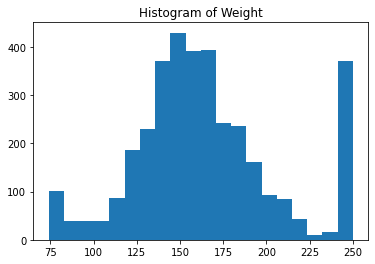

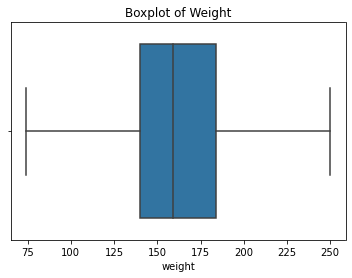

In [38]:
# Outlier detection and treatment (if needed)
plt.hist(df['weight'], 20)
plt.title('Histogram of Weight')
plt.show()

sns.boxplot(df['weight'])
plt.title('Boxplot of Weight')
plt.show()

In [39]:
# data looks better after treatment

In [40]:
quartiles = np.quantile(df['weight'][df['weight'].notnull()], [.25, .75])
w_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {w_4iqr}')
outlier_w = df.loc[np.abs(df['weight'] - df['weight'].median()) > w_4iqr, 'weight']
outlier_w

Q1 = 140.0, Q3 = 184.0, 4*IQR = 176.0


Series([], Name: weight, dtype: float64)

In [41]:
df.loc[np.abs(df['weight'] - df['weight'].median()) > w_4iqr, 'weight'] = np.nan

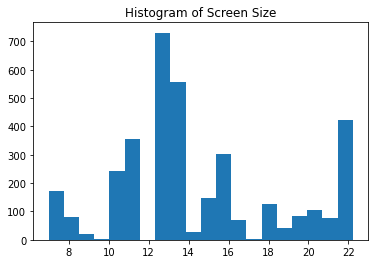

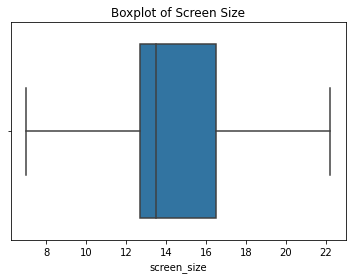

In [42]:
# Outlier detection and treatment (if needed)
plt.hist(df['screen_size'], 20)
plt.title('Histogram of Screen Size')
plt.show()

sns.boxplot(df['screen_size'])
plt.title('Boxplot of Screen Size')
plt.show()

In [43]:
# data looks treated.

In [44]:
quartiles = np.quantile(df['screen_size'][df['screen_size'].notnull()], [.25, .75])
scrn_s_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {scrn_s_4iqr}')
outlier_scrn_s = df.loc[np.abs(df['screen_size'] - df['screen_size'].median()) > scrn_s_4iqr, 'screen_size']
outlier_scrn_s

Q1 = 12.7, Q3 = 16.51, 4*IQR = 15.240000000000009


Series([], Name: screen_size, dtype: float64)

In [45]:
df.loc[np.abs(df['screen_size'] - df['screen_size'].median()) > scrn_s_4iqr, 'screen_size'] = np.nan

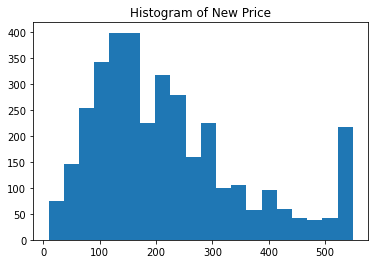

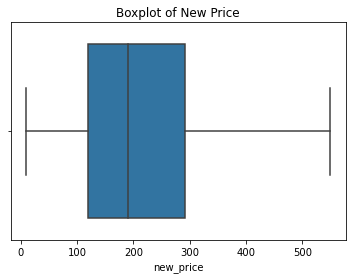

In [46]:
# Outlier detection and treatment (if needed)
plt.hist(df['new_price'], 20)
plt.title('Histogram of New Price')
plt.show()

sns.boxplot(df['new_price'])
plt.title('Boxplot of New Price')
plt.show()

In [47]:
# data looks right skewed and possibly some extreme outliers.

In [48]:
quartiles = np.quantile(df['new_price'][df['new_price'].notnull()], [.25, .75])
n_p_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {n_p_4iqr}')
n_p_scrn_s = df.loc[np.abs(df['new_price'] - df['new_price'].median()) > n_p_4iqr, 'new_price']
n_p_scrn_s

Q1 = 120.13, Q3 = 291.935, 4*IQR = 687.22


Series([], Name: new_price, dtype: float64)

In [49]:
df.loc[np.abs(df['new_price'] - df['new_price'].median()) > n_p_4iqr, 'new_price'] = np.nan

In [50]:
 # Preparing data for modeling 
    # Any other preprocessing steps (if needed)

## Building a Linear Regression model

In [51]:
# df["brand_name"] = df["brand_name"].astype("category")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3570
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   screen_size       3571 non-null   float64
 2   main_camera_mp    3571 non-null   float64
 3   selfie_camera_mp  3571 non-null   float64
 4   int_memory        3571 non-null   float64
 5   ram               3571 non-null   float64
 6   battery           3571 non-null   float64
 7   weight            3571 non-null   float64
 8   release_year      3571 non-null   int64  
 9   days_used         3571 non-null   int64  
 10  new_price         3571 non-null   float64
 11  used_price        3571 non-null   float64
 12  os_0              3571 non-null   float64
 13  os_1              3571 non-null   float64
 14  os_2              3571 non-null   float64
 15  os_3              3571 non-null   float64
 16  4g_0              3571 non-null   float64


In [53]:
# missing values are back
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)
df.count()

brand_name          3571
screen_size         3571
main_camera_mp      3571
selfie_camera_mp    3571
int_memory          3571
ram                 3571
battery             3571
weight              3571
release_year        3571
days_used           3571
new_price           3571
used_price          3571
os_0                3571
os_1                3571
os_2                3571
os_3                3571
4g_0                3571
4g_1                3571
5g_2                3571
5g_3                3571
dtype: int64

In [54]:
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
# defining X and y variables
X = df.drop(["used_price", "ram", "brand_name"], axis=1)
y = df["used_price"]

print(X.head())
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  battery  weight  \
0        22.23           13.00              5.00       64.00  3020.00  146.00   
1        22.23           13.00             16.00      128.00  4300.00  213.00   
2        22.23           13.00              8.00      128.00  4200.00  213.00   
3        22.23           13.00              8.00       64.00  6850.00  250.00   
4        15.72           13.00              8.00       64.00  5000.00  185.00   

   release_year  days_used  new_price  os_0  os_1  os_2  os_3  4g_0  4g_1  \
0          2020        127     111.62  0.00  0.00  0.00  1.00  0.00  1.00   
1          2020        325     249.39  0.00  0.00  0.00  1.00  0.00  1.00   
2          2020        162     359.47  0.00  0.00  0.00  1.00  0.00  1.00   
3          2020        345     278.93  0.00  0.00  0.00  1.00  0.00  1.00   
4          2020        293     140.87  0.00  0.00  0.00  1.00  0.00  1.00   

   5g_2  5g_3  
0  1.00  0.00  
1  0.00  1.00  
2 

In [55]:
# Build the model and comment on the model statistics
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
x_train
# Split the data

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,new_price,os_0,os_1,os_2,os_3,4g_0,4g_1,5g_2,5g_3
1248,12.70,13.00,5.00,16.00,2840.00,160.00,2015,945,329.65,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
2206,13.49,16.00,16.00,64.00,3400.00,158.00,2016,986,441.99,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
1623,10.16,2.00,5.00,16.00,1500.00,117.00,2015,634,63.43,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
2245,13.49,13.00,17.00,64.00,3200.00,153.00,2017,790,260.71,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
1043,17.78,3.15,0.30,16.00,4100.00,234.00,2013,613,98.02,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,15.24,12.00,16.00,64.00,3200.00,167.40,2018,518,401.68,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
905,12.70,5.00,0.30,16.00,1800.00,170.00,2014,874,80.76,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
1096,12.70,8.00,5.00,16.00,4000.00,167.60,2016,941,119.79,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
235,16.67,13.00,8.00,64.00,3020.00,150.00,2020,228,108.82,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 3570
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   screen_size       3571 non-null   float64
 2   main_camera_mp    3571 non-null   float64
 3   selfie_camera_mp  3571 non-null   float64
 4   int_memory        3571 non-null   float64
 5   ram               3571 non-null   float64
 6   battery           3571 non-null   float64
 7   weight            3571 non-null   float64
 8   release_year      3571 non-null   int64  
 9   days_used         3571 non-null   int64  
 10  new_price         3571 non-null   float64
 11  used_price        3571 non-null   float64
 12  os_0              3571 non-null   float64
 13  os_1              3571 non-null   float64
 14  os_2              3571 non-null   float64
 15  os_3              3571 non-null   float64
 16  4g_0              3571 non-null   float64


In [57]:
df["brand_name"] = df["brand_name"].astype("category")

In [58]:
df.isnull().sum() # no null values

brand_name          0
screen_size         0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
os_0                0
os_1                0
os_2                0
os_3                0
4g_0                0
4g_1                0
5g_2                0
5g_3                0
dtype: int64

In [59]:
df.drop(['brand_name'], axis=1) # brand name is a difficult data field and should have no impact to customer selection. 

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,os_0,os_1,os_2,os_3,4g_0,4g_1,5g_2,5g_3
0,22.23,13.00,5.00,64.00,4.00,3020.00,146.00,2020,127,111.62,86.96,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
1,22.23,13.00,16.00,128.00,4.00,4300.00,213.00,2020,325,249.39,161.49,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
2,22.23,13.00,8.00,128.00,4.00,4200.00,213.00,2020,162,359.47,247.19,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
3,22.23,13.00,8.00,64.00,4.00,6850.00,250.00,2020,345,278.93,180.23,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
4,15.72,13.00,8.00,64.00,4.00,5000.00,185.00,2020,293,140.87,103.80,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,15.88,8.00,8.00,64.00,4.00,5000.00,190.00,2019,232,549.64,247.19,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
3567,15.24,13.00,8.00,128.00,4.00,4000.00,200.00,2018,541,518.81,247.19,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
3568,18.73,13.00,5.00,32.00,4.00,4000.00,165.00,2020,201,92.65,69.81,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
3569,18.73,13.00,5.00,32.00,4.00,4000.00,160.00,2020,149,101.92,76.07,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00


In [60]:
# Starting linear regression
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [61]:
# Show sizes of train and test populations 
print("Number of rows in train pop =", x_train.shape[0])
print("Number of rows in test pop =", x_test.shape[0])

Number of rows in train pop = 2499
Number of rows in test pop = 1072


In [62]:
# Failed to import correct packages. Correcting now. 
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [63]:
# Display model coefficients. e.g. values that modify predictor values. 
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,0.33
main_camera_mp,-0.37
selfie_camera_mp,0.76
int_memory,0.10
battery,-0.00
weight,-0.01
release_year,-0.36
days_used,-0.08
new_price,0.38
os_0,-1.76


In [64]:
## The assumptions of linear regression with R squared.
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE -These functions are freely shared as part of student's class learning. 
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting via the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # must define prior to use
    adjr2 = adj_r2_score(predictors, target, pred)  # computes adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # computes RMSE
    mae = mean_absolute_error(target, pred)  # computes MAE
    mape = mape_score(target, pred)  # computes MAPE 

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],)

    return df_perf

In [65]:
# Apply training data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.01,10.33,0.96,0.95,18.04


# Observations
- R squared and adjusted R squared above .9 indicates very strong explanability of the dependent variable by the independent variables. That's great. 
- RMSE of 14.01 and MAE of 10.33 are similar, but not ideal. 
- MAPE of 18.04 means we can accurately predict to within 19% of the ideal used_price. This may not be accurate enough for profitability.  

In [66]:
# Adding data
x_train1 = sm.add_constant(x_train)
# adding further constant to the data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3778.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:35:25   Log-Likelihood:                -10142.
No. Observations:                2499   AIC:                         2.031e+04
Df Residuals:                    2484   BIC:                         2.040e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              350.2597    238.915  

In [67]:
# I am very weak at interpreting these results. Overall P values appear acceptable except battery. Perhaps drop battery. 

In [68]:
# assumptions of the linear regression
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

   # Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [69]:
checking_vif(x_train1) # Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911

,feature,VIF
0,const,0.00
1,screen_size,3.34
2,main_camera_mp,1.94
3,selfie_camera_mp,3.43
4,int_memory,2.00
5,battery,3.48
6,weight,2.99
7,release_year,4.75
8,days_used,2.55
9,new_price,2.23


# Observations
- Inf indicates exact match. 
- release_year above acceptable level of (4), battery may also be useful to drop as approaches 4. 

In [70]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
  I dont have high VIF, but I want to further tune the bodel to reduce multicollinearity. 
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # I built OLS by dropping one of the high VIF columns at a time
     
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [71]:
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
col_list = ['sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,sacral_slope,0.95,14.05
1,pelvic_radius,0.95,14.05
2,degree_spondylolisthesis,0.95,14.05


In [72]:
col_to_drop = "release_year"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping release_year


,feature,VIF
0,const,0.00
1,screen_size,3.30
2,main_camera_mp,1.93
3,selfie_camera_mp,2.82
4,int_memory,1.99
5,battery,3.43
6,weight,2.97
7,days_used,1.86
8,new_price,2.07
9,os_0,inf


In [73]:
col_to_drop = "battery"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping battery


,feature,VIF
0,const,0.00
1,screen_size,2.94
2,main_camera_mp,1.93
3,selfie_camera_mp,2.82
4,int_memory,1.99
5,weight,2.28
6,days_used,1.84
7,new_price,2.06
8,os_0,inf
9,os_1,inf


# Observation
- I attempted to further tune the model to reduce variance by further reducing multicollinearity. I had little effect, although model performance appears strong. 

## Model performance evaluation

In [74]:
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
olsmod1 = sm.OLS(y_train, x_train3).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     4407.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:35:26   Log-Likelihood:                -10143.
No. Observations:                2499   AIC:                         2.031e+04
Df Residuals:                    2486   BIC:                         2.039e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.4363      0.985  

In [75]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'days_used', 'new_price', 'os_0', 'os_1', 'os_3', '4g_0', '4g_1', '5g_2', '5g_3']


In [76]:
x_train4 = x_train3[selected_features]
x_test4 = x_test3[selected_features]

In [77]:
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
olsmod2 = sm.OLS(y_train, x_train4).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     4806.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:35:26   Log-Likelihood:                -10144.
No. Observations:                2499   AIC:                         2.031e+04
Df Residuals:                    2487   BIC:                         2.038e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.2641      1.080  

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [78]:
# Actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911

,Actual Values,Fitted Values,Residuals
1248,98.87,108.29,-9.42
2206,132.62,159.55,-26.93
1623,25.27,38.38,-13.11
2245,104.26,108.35,-4.09
1043,39.22,50.99,-11.77


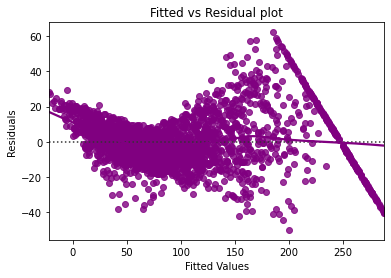

In [79]:
# The fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

# Observation
- Fitted values above 200 show a strong negative residual trend. Unsure if this indicates a pattern by itself. 

## Final Model Summary

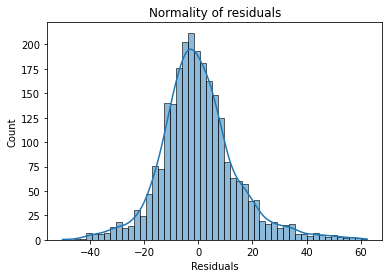

In [80]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

# Observation
-Looks normally distributed

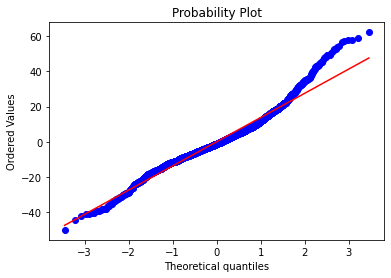

In [81]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

# Observation
- Probability closely follows theoretical trend

In [82]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9668676853179932, pvalue=1.5079805110776065e-23)

# Observation
- The p value is way below .05. 

In [83]:
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 0.9632009177101103), ('p-value', 0.7451513583029961)]

In [84]:
# predictions on the test set
pred = olsmod2.predict(x_test4)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
255,194.45,170.35
1398,170.24,149.26
2253,164.76,206.69
579,39.09,43.07
3123,45.08,38.47
1959,51.05,57.63
3111,40.07,34.45
1456,54.75,51.31
3332,95.06,106.16
855,44.03,46.76


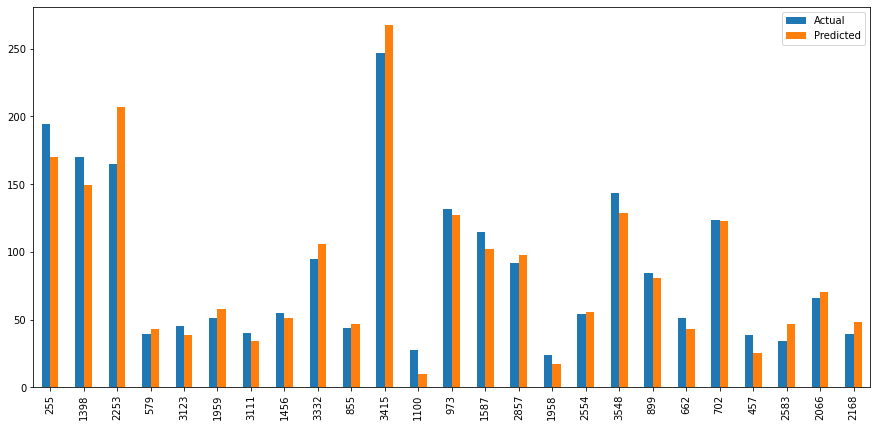

In [85]:
df = df_pred_test.sample(25, random_state=1)
df.plot(kind="bar", figsize=(15, 7))
plt.show()

In [86]:
# checking train model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train4, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.02,10.32,0.96,0.95,17.99


In [87]:
# checking test model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test4, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.36,10.32,0.95,0.95,17.53


In [88]:
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,14.01,14.02
MAE,10.33,10.32
R-squared,0.96,0.96
Adj. R-squared,0.95,0.95
MAPE,18.04,17.99


In [89]:
# Note: Logic and code modeled after Great Learning Case study. https://olympus.greatlearning.in/courses/52898/files/3759640?module_item_id=1395911
olsmodel_final = sm.OLS(y_train, x_train4).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     4806.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:35:27   Log-Likelihood:                -10144.
No. Observations:                2499   AIC:                         2.031e+04
Df Residuals:                    2487   BIC:                         2.038e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.2641      1.080  

## Actionable Insights and Recommendations

Based on the result of the linear regression, we can see that the model can be used to support pricing determinations for used cell phones. 

ReCell stands to maximize profits by selling phones with high new price. Thus the variance of 18% in model predictions can be more easily made up for be keeping used_price inflated.  

ReCell’s business model does not include a multi-factor rating scale for the condition of the used phone, and if possible, this would be valuable in determining resale value.

A 14% growth rate in a burgeoning $53 billion market represents a business opportunity, which ReCell is poised to capitalize upon through use of machine learning.

In [90]:
# Q1: What does the distribution of used phone prices look like?
df1[["used_price"]].describe()

,used_price
count,3571.00
mean,109.88
std,121.50
min,2.51
25%,45.20
50%,75.53
75%,126.00
max,1916.54


The total number of used phones in our database is 3571;
Minimum value is $2.51 and maximum value is $1916.54.


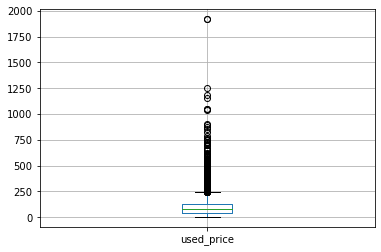

In [91]:
print ("The total number of used phones in our database is 3571;") 
df1.boxplot('used_price')
print ("Minimum value is $2.51 and maximum value is $1916.54.")

In [92]:
# Q2: What percentage of the used phone market is dominated by Android devices?
# "os" = android / whole x 100
df1["os"].value_counts (dropna=False)

Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64

In [93]:
# We know that our Android count is 3246 and the total # in our sample is 3571.
A= (3246/3571)*100
print (A)
print ("The % of Andorid devices in our sample is 91%.")

90.89890786894428
The % of Andorid devices in our sample is 91%.


The % of Andorid devices in our sample is 91%.


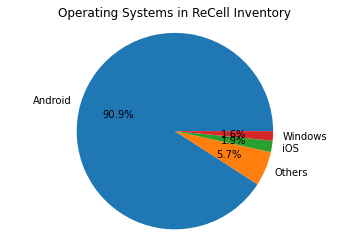

In [94]:
os_a = [3246,202,67, 56]

my_labels = 'Android','Others','iOS', 'Windows'
plt.pie(os_a,labels=my_labels,autopct='%1.1f%%')
plt.title('Operating Systems in ReCell Inventory')
plt.axis('equal')
print ("The % of Andorid devices in our sample is 91%.")
plt.show()

In [95]:
# Q3: The amount of RAM is important for the smooth functioning of a phone. 
# How does the amount of RAM vary with the brand?
# sort by "brand_name_written" and then calculate the distribution of each 'brand_name_written' by the 'ram' column  

In [96]:
 df1['brand_name']. value_counts() 

Others        509
Samsung       364
Huawei        264
LG            212
Lenovo        172
ZTE           141
Xiaomi        134
Oppo          129
Asus          126
Alcatel       125
Nokia         121
Micromax      120
Honor         118
Vivo          117
HTC           110
Motorola      110
Sony           88
Meizu          62
Apple          59
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Celkon         37
Lava           36
Karbonn        30
Spice          30
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

In [97]:
k=df1.sort_values('brand_name', inplace=True, ascending=False)
print (df1.sort_values)

<bound method DataFrame.sort_values of      brand_name       os  screen_size   4g  5g  main_camera_mp  \
3228        ZTE  Android        13.02  yes  no           13.00   
3214        ZTE  Android        13.02  yes  no           16.00   
3222        ZTE  Android        15.24  yes  no           13.00   
3221        ZTE  Android        10.16  yes  no            5.00   
3220        ZTE  Android        13.49  yes  no           16.00   
...         ...      ...          ...  ...  ..             ...   
461        Acer  Android        12.70   no  no           13.00   
462        Acer  Android        12.70   no  no            8.00   
463        Acer  Android        12.70  yes  no            8.00   
464        Acer  Android        10.16   no  no            2.00   
422        Acer  Android        25.56   no  no            5.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3228              5.00       16.00 4.00  2500.00  160.00          2016   
3214              8.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

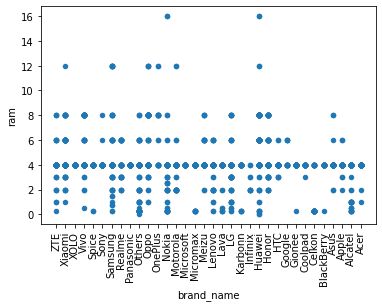

In [98]:
df1.plot.scatter(x='brand_name', y='ram')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='ram', ylabel='brand_name'>

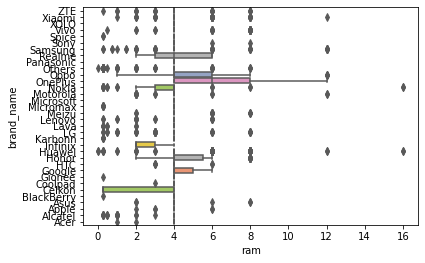

In [99]:
sns.boxplot(y=df1["brand_name"], x=df1["ram"], orient="h", palette="Set2")

<AxesSubplot:xlabel='ram', ylabel='brand_name'>

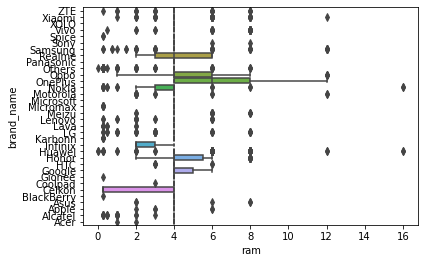

In [100]:
sns.boxplot(y=df1["brand_name"], x=df1["ram"])

<AxesSubplot:xlabel='ram', ylabel='brand_name'>

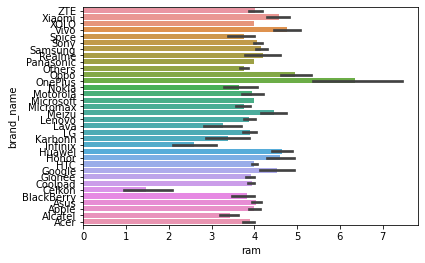

In [101]:
sns.barplot(x="ram",
           y="brand_name", data=df1)

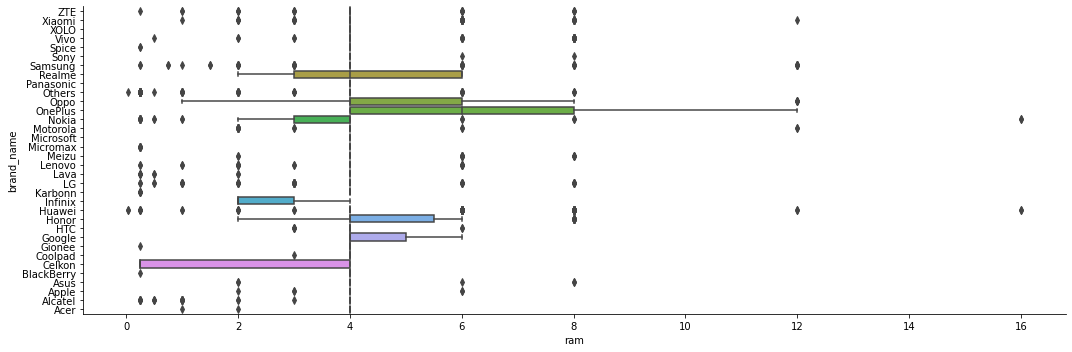

In [102]:
j = sns.factorplot("ram",y="brand_name",
        data=df1, kind="box", aspect=3)

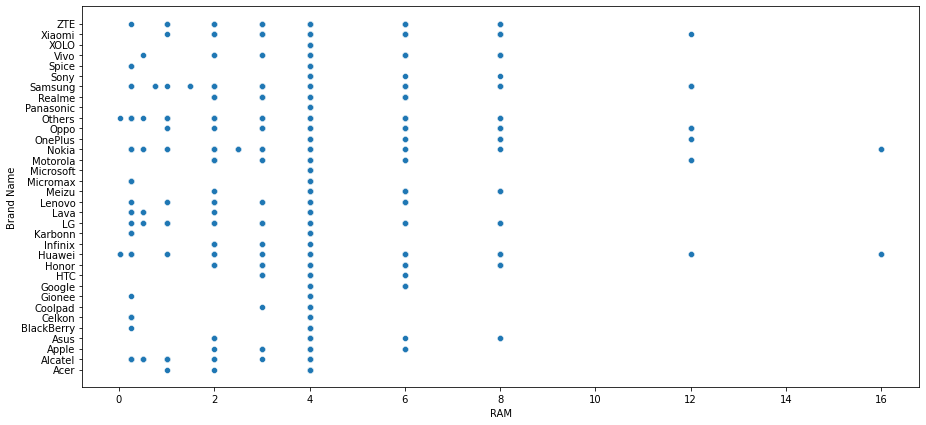

In [103]:
plt.figure(figsize=(15,7))           
sns.scatterplot(df1['ram'],df1['brand_name'])
plt.ylabel('Brand Name')
plt.xlabel('RAM')
plt.show()

<AxesSubplot:xlabel='ram', ylabel='brand_name'>

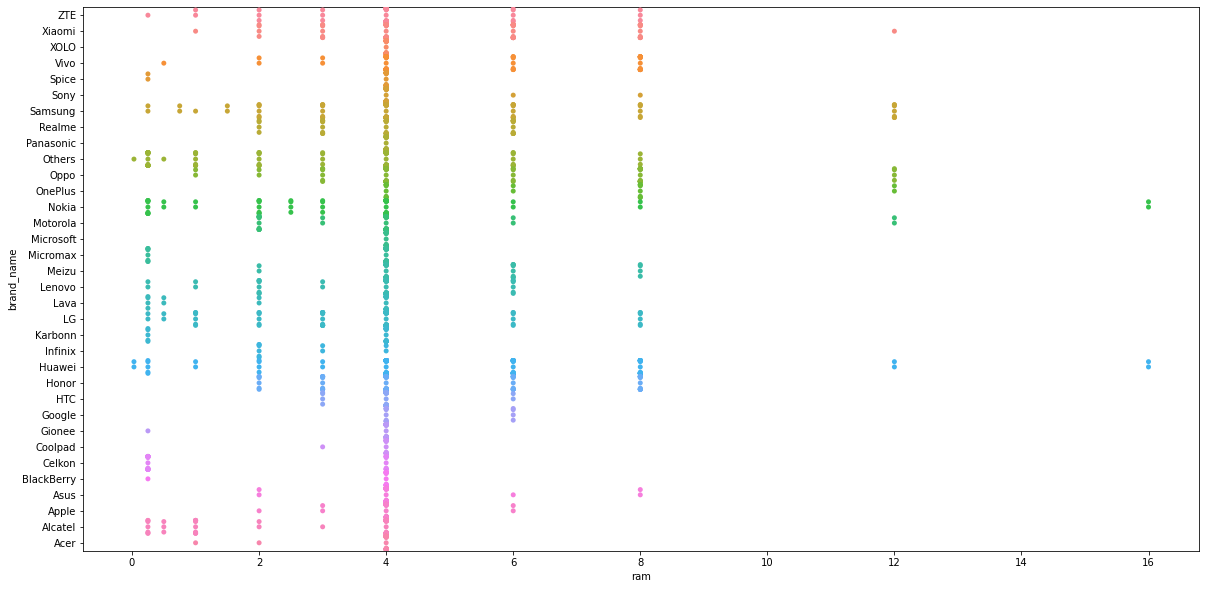

In [104]:
plt.figure(figsize=(20,10)) 
sns.swarmplot(data = df1, x='ram',y='brand_name')

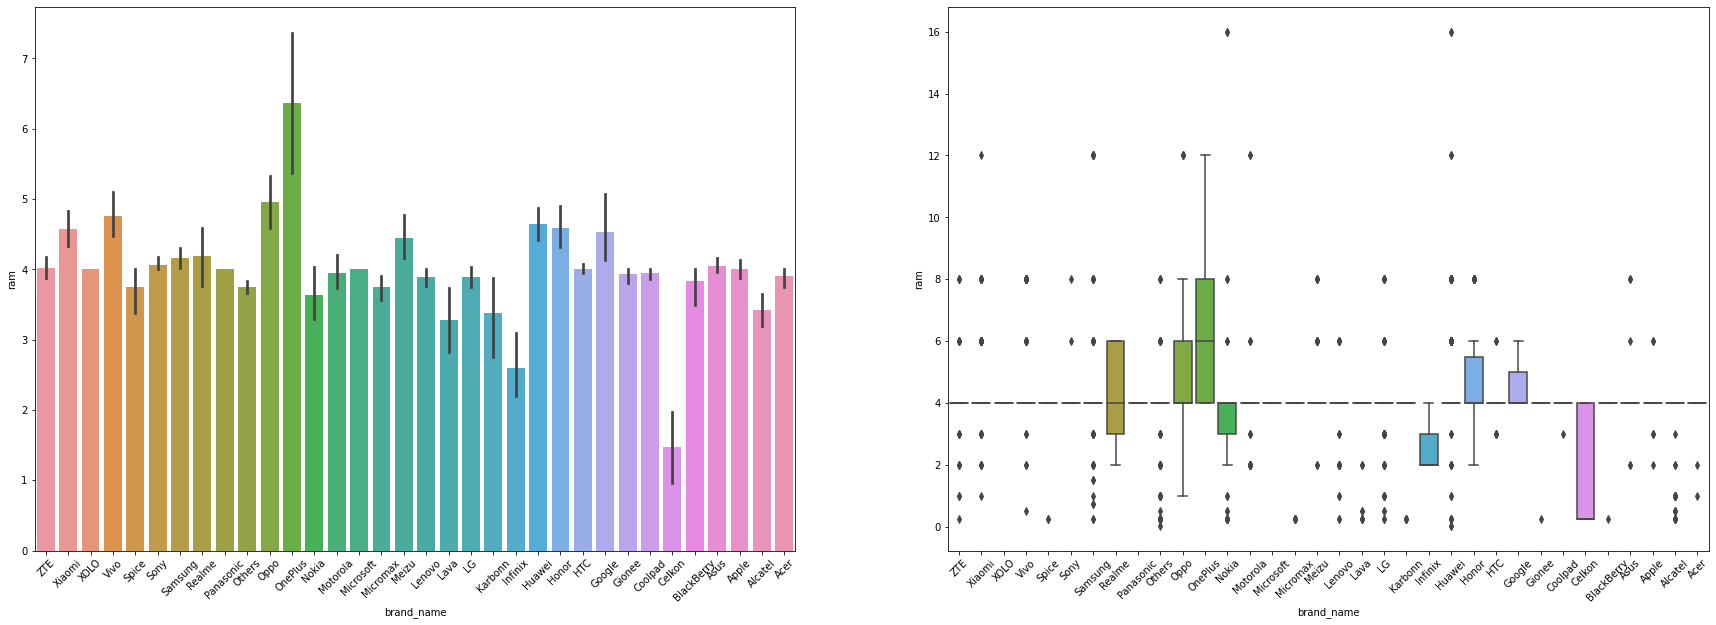

In [105]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=45)

plt.show()

In [106]:
# Q4: A large battery often increases a phone's weight, making it feel uncomfortable in the hands. 
# How does the weight vary for phones offering large batteries (more than 4500 mAh)?
# This is similar to the developing/developed example in the MLS2_LifeExpectancy-Demo model.

In [107]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3228,ZTE,Android,13.02,yes,no,13.00,5.00,16.00,4.00,2500.00,160.00,2016,949,151.94,45.43
3214,ZTE,Android,13.02,yes,no,16.00,8.00,32.00,4.00,2705.00,153.00,2016,1075,220.21,66.18
3222,ZTE,Android,15.24,yes,no,13.00,5.00,16.00,4.00,3400.00,160.00,2016,583,209.40,104.68
3221,ZTE,Android,10.16,yes,no,5.00,2.00,32.00,4.00,1400.00,110.00,2016,601,68.70,27.26
3220,ZTE,Android,13.49,yes,no,16.00,8.00,64.00,4.00,3000.00,162.00,2016,1040,279.53,83.78


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 3228 to 422
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3571 non-null   float64
 6   selfie_camera_mp  3571 non-null   float64
 7   int_memory        3571 non-null   float64
 8   ram               3571 non-null   float64
 9   battery           3571 non-null   float64
 10  weight            3571 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 575.4+ KB


In [109]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
df1[numeric_columns] = df1[numeric_columns].apply(medianFiller, axis=0)
df1.count()

brand_name          3571
os                  3571
screen_size         3571
4g                  3571
5g                  3571
main_camera_mp      3571
selfie_camera_mp    3571
int_memory          3571
ram                 3571
battery             3571
weight              3571
release_year        3571
days_used           3571
new_price           3571
used_price          3571
dtype: int64

In [110]:
mask = df1['battery'] > 4500
df3 = df[mask]
df2 = df[~mask]
df3.head()
df2.count()

Actual       23
Predicted    23
dtype: int64

In [111]:
df3.count()

Actual       2
Predicted    2
dtype: int64

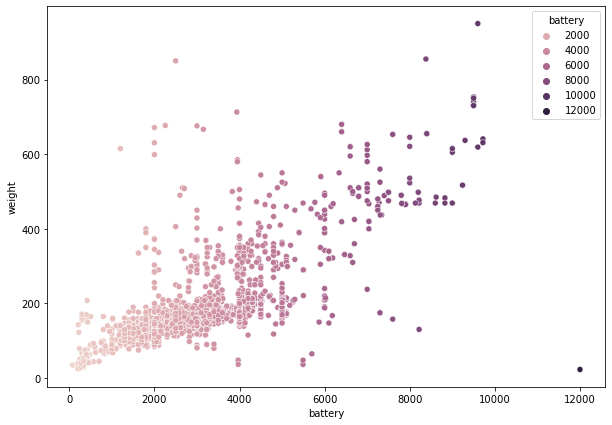

In [112]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="weight", x="battery", hue= 'battery', data=df1)

plt.show()

In [113]:
# df.boxplot (column= ['battery'], figsize= (6,3))

In [114]:
# Q5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.
# How many phones are available across different brands with a screen size larger than 6 inches?
# # Bin and count
# Filter the data  

In [115]:
df_scrn_lrg = df1[(df1.screen_size > 6)]
df_scrn_lrg.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3228,ZTE,Android,13.02,yes,no,13.00,5.00,16.00,4.00,2500.00,160.00,2016,949,151.94,45.43
3214,ZTE,Android,13.02,yes,no,16.00,8.00,32.00,4.00,2705.00,153.00,2016,1075,220.21,66.18
3222,ZTE,Android,15.24,yes,no,13.00,5.00,16.00,4.00,3400.00,160.00,2016,583,209.40,104.68
3221,ZTE,Android,10.16,yes,no,5.00,2.00,32.00,4.00,1400.00,110.00,2016,601,68.70,27.26
3220,ZTE,Android,13.49,yes,no,16.00,8.00,64.00,4.00,3000.00,162.00,2016,1040,279.53,83.78


In [116]:
df_scrn_lrg.count()

brand_name          3450
os                  3450
screen_size         3450
4g                  3450
5g                  3450
main_camera_mp      3450
selfie_camera_mp    3450
int_memory          3450
ram                 3450
battery             3450
weight              3450
release_year        3450
days_used           3450
new_price           3450
used_price          3450
dtype: int64

In [117]:
val_count=df_scrn_lrg.brand_name.value_counts()
val_count

Others        486
Samsung       342
Huawei        257
LG            204
Lenovo        172
ZTE           140
Xiaomi        134
Oppo          129
Asus          126
Honor         118
Alcatel       118
Vivo          117
Micromax      116
Motorola      110
HTC           110
Sony           86
Nokia          86
Meizu          62
Gionee         56
Apple          53
Acer           51
XOLO           49
Panasonic      47
Realme         41
Lava           36
Celkon         31
Spice          30
Karbonn        30
Microsoft      22
Coolpad        22
BlackBerry     22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

In [118]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

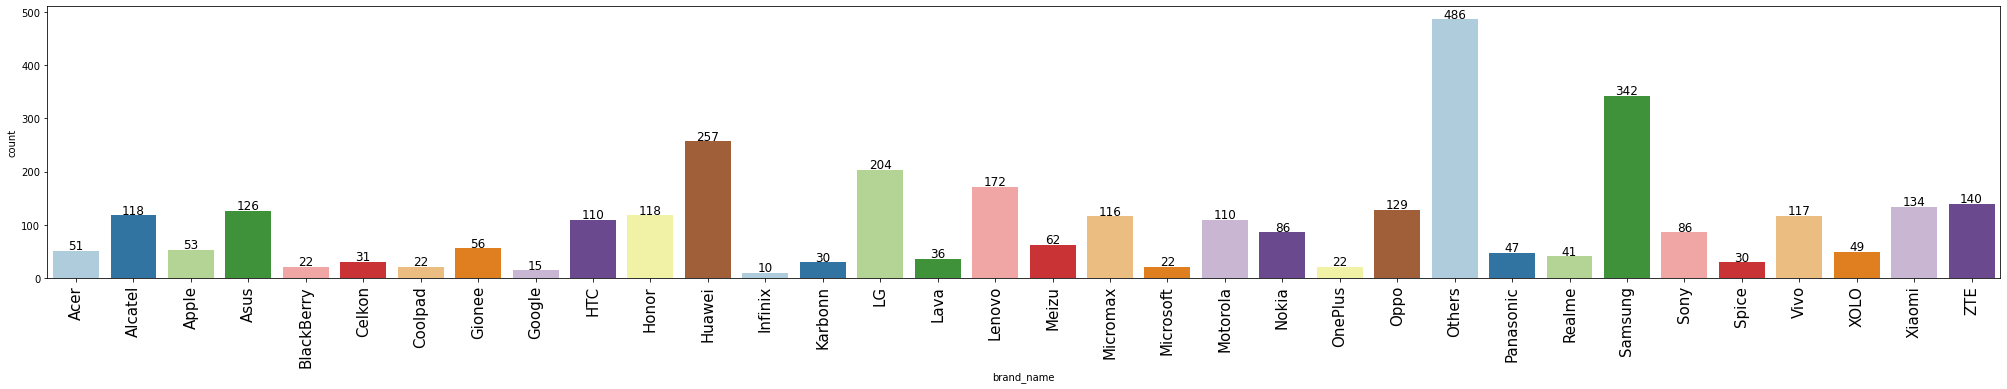

In [119]:
labeled_barplot(df_scrn_lrg, "brand_name", perc=False)

In [120]:
# Q6: Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. 
# What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [121]:
df_sel_big = df1[(df1.selfie_camera_mp >8.00)]
df_sel_big.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3217,ZTE,Android,13.49,yes,no,13.00,13.00,32.00,4.00,5000.00,190.00,2016,793,229.03,91.70
3213,ZTE,Android,13.02,yes,no,23.00,13.00,64.00,4.00,3000.00,158.00,2016,835,218.49,65.65
3209,ZTE,Android,13.02,yes,no,13.00,13.00,32.00,4.00,2730.00,141.00,2017,577,250.35,125.16
3237,ZTE,Android,12.70,yes,no,13.00,13.00,32.00,4.00,2500.00,131.00,2015,834,278.96,83.63
211,ZTE,Android,25.56,yes,yes,8.00,12.00,128.00,6.00,5100.00,210.00,2020,278,311.11,209.72


In [122]:
df_sel_big.count()

brand_name          666
os                  666
screen_size         666
4g                  666
5g                  666
main_camera_mp      666
selfie_camera_mp    666
int_memory          666
ram                 666
battery             666
weight              666
release_year        666
days_used           666
new_price           666
used_price          666
dtype: int64

In [123]:
val_count_sel_big=df_sel_big.brand_name.value_counts()
val_count_sel_big

Huawei        91
Vivo          78
Oppo          75
Xiaomi        65
Samsung       60
Honor         43
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
OnePlus       18
Realme        18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64

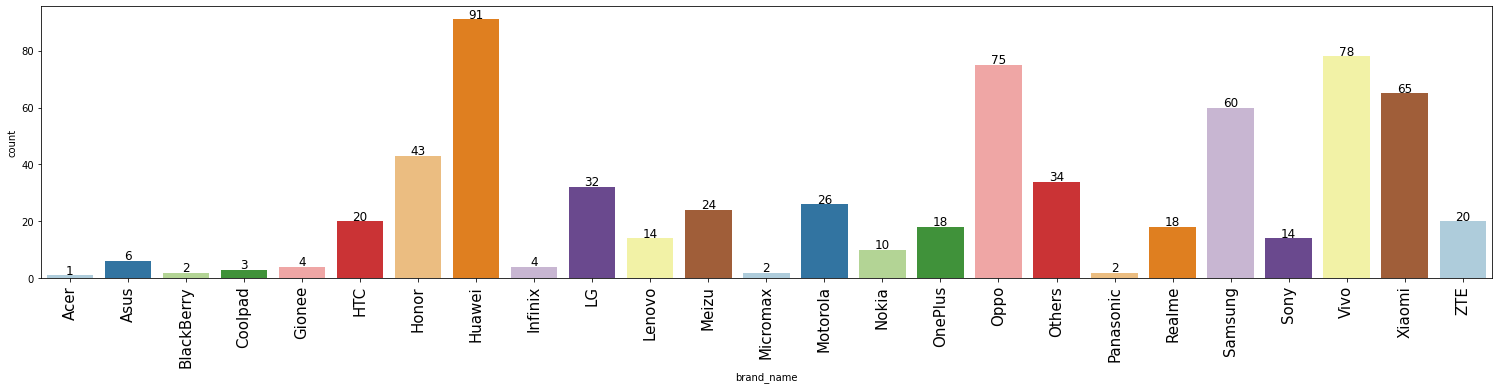

In [124]:
labeled_barplot(df_sel_big, "brand_name", perc=False)

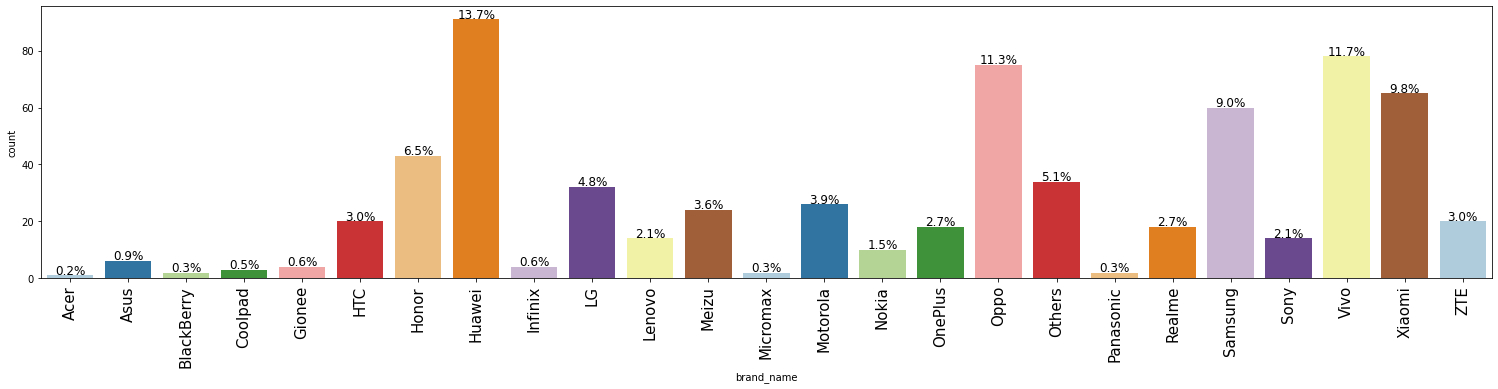

In [125]:
labeled_barplot(df_sel_big, "brand_name", perc=True)

In [126]:
lsc=(666/3571)*100
lsc

18.65023802856343

# Q7: Which attributes are highly correlated with the used phone price?
- I think this is the test for multi-correlinarity. Use of VIF accentuates correllation of the following factors as predictive of used phone price: 
- New phone price, release year, battery, and selfie_camera_mp. 

In [5]:
!pip3 install pigar
import pigar
pigar /Documents/Data_Science/Foundations_Recell

ModuleNotFoundError: No module named 'pigar'

In [2]:
 !pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
